In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif

 

# Sample data table (you should replace this with your own data)
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

 

# Convert categorical data to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

 

# Split data into features and target variable
X = data.drop('buys_computer_yes', axis=1)
y = data['buys_computer_yes']

 

# Calculate Information Gain for each feature
information_gain = mutual_info_classif(X, y)

 

# Find the feature with the highest Information Gain
root_node_feature_index = np.argmax(information_gain)
root_node_feature_name = X.columns[root_node_feature_index]

 

print(f"The root node feature selected is: {root_node_feature_name}")

The root node feature selected is: age_<=30


In [1]:
import numpy as np
import pandas as pd
from math import log2

# Define the dataset
data = {
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40', '<=30', '31...40', '31...40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

# Function to calculate entropy
def calculate_entropy(data):
    counts = data.value_counts(normalize=True)
    entropy = -sum(counts * np.log2(counts))
    return entropy

# Function to calculate information gain
def calculate_information_gain(df, attribute, target):
    # Calculate the entropy of the entire dataset
    total_entropy = calculate_entropy(df[target])

    # Calculate the entropy after splitting on the attribute
    unique_values = df[attribute].unique()
    weighted_entropy = 0

    for value in unique_values:
        subset = df[df[attribute] == value]
        subset_entropy = calculate_entropy(subset[target])
        weight = len(subset) / len(df)
        weighted_entropy += weight * subset_entropy

    # Calculate information gain
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Define the target attribute
target_attribute = 'buys_computer'

# Calculate information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
information_gains = {}

for attribute in attributes:
    information_gain = calculate_information_gain(df, attribute, target_attribute)
    information_gains[attribute] = information_gain

# Find the attribute with the highest information gain
root_node_attribute = max(information_gains, key=information_gains.get)
root_node_information_gain = information_gains[root_node_attribute]

print("Information Gains:")
for attribute, gain in information_gains.items():
    print(f"{attribute}: {gain}")

print("\nRoot Node Attribute:", root_node_attribute)
print("Root Node Information Gain:", root_node_information_gain)

Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949

Root Node Attribute: age
Root Node Information Gain: 0.24674981977443933


In [2]:
Tr_X = df[['age', 'income', 'student', 'credit_rating']]
Tr_y = df['buys_computer']

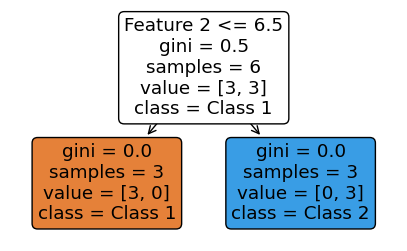

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
data_class_1 = np.array([[1, 2], [3, 4], [5, 6]])
data_class_2 = np.array([[6, 7], [8, 9], [10, 11]])
Tr_X = np.vstack([data_class_1, data_class_2])
Tr_y = np.array([0, 0, 0, 1, 1, 1])
ml_model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X, Tr_y)
plt.figure(figsize=(5,3))
plot_tree(model, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 1", "Class 2"], rounded=True)
plt.show()

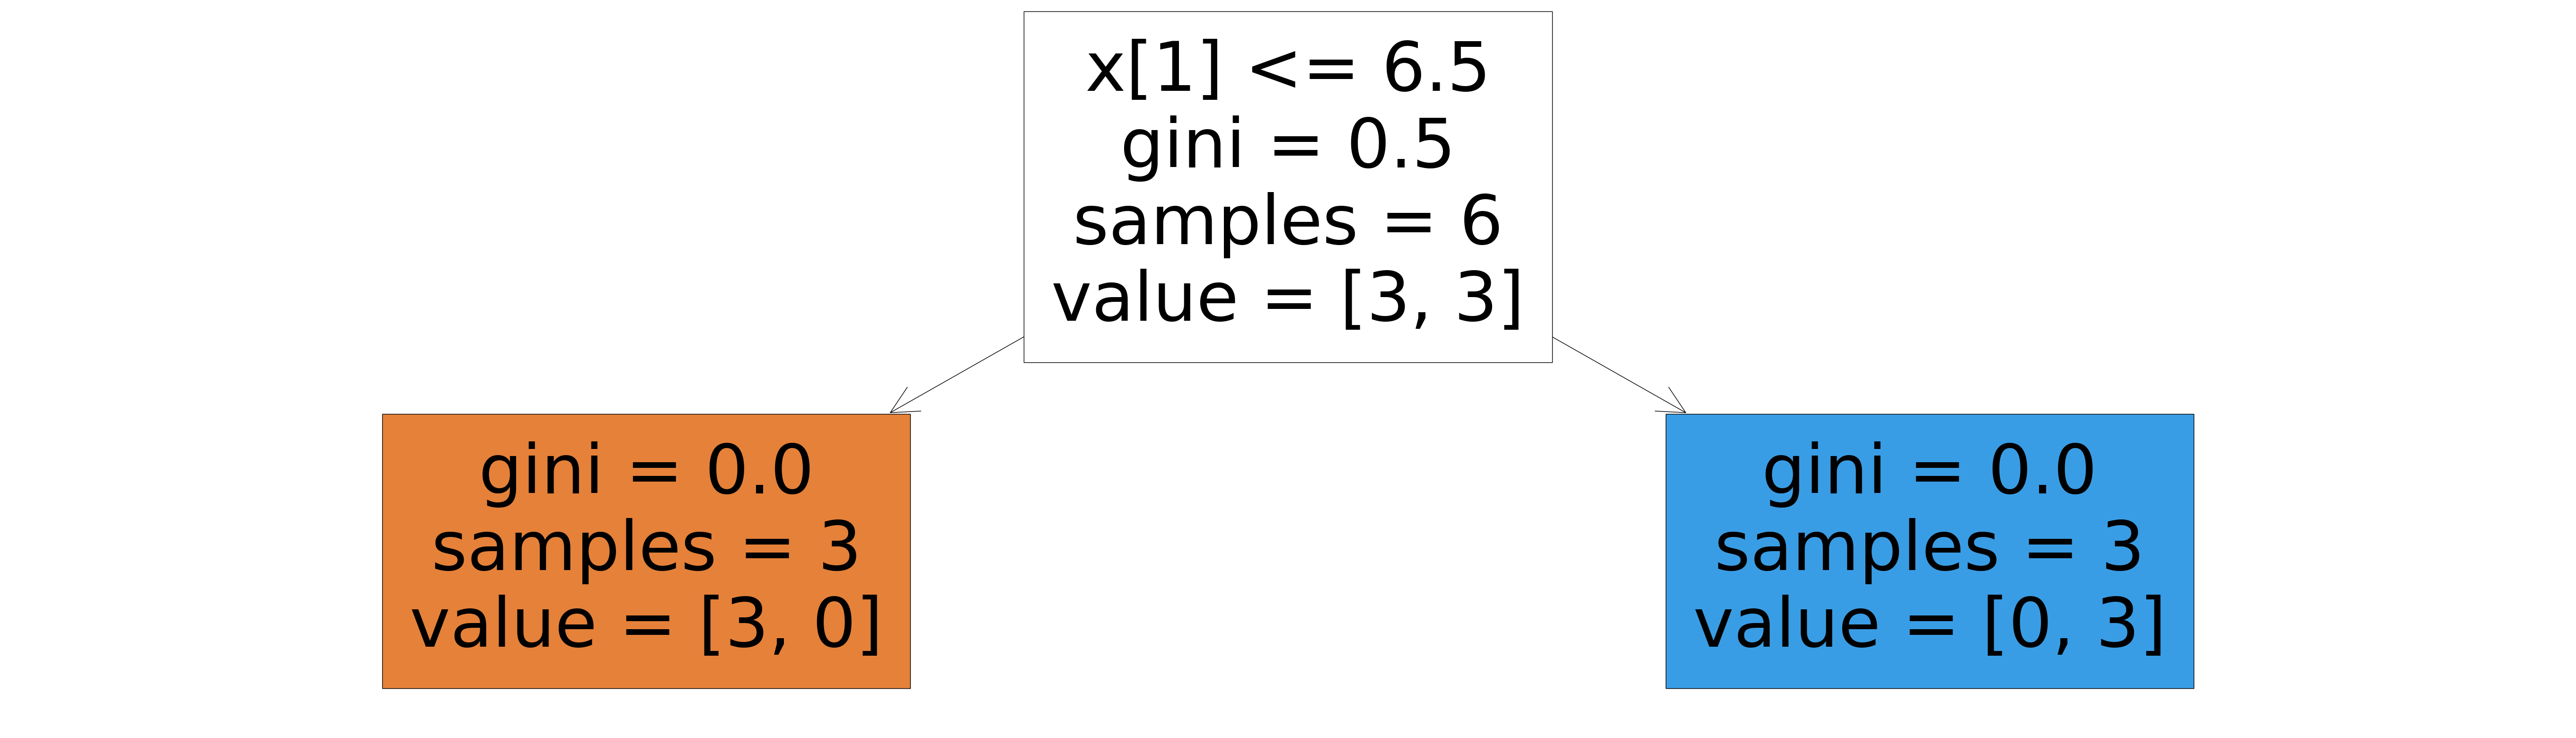

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70, 20))
tree.plot_tree(model, filled=True)
plt.show()


In [8]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
tree.plot_tree(model_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['setosa', 'versicolor', 'virginica'], dtype='<U10') instead.

<Figure size 2000x1000 with 0 Axes>

In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Create the dataset
data = {
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)


df


,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31-40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31-40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [15]:
# Calculate the entropy at the root node
class_counts = df['buys_computer'].value_counts()
class_probabilities = class_counts / len(df)
root_entropy = -np.sum(class_probabilities * np.log2(class_probabilities))

# Calculate the entropy and information gain for each attribute
attributes = ['age', 'income', 'student', 'credit_rating']
entropies = []
information_gains = []

for attribute in attributes:
    attribute_entropy = 2
    attribute_information_gain = 2

    # Split the dataset based on the unique values of the attribute
    attribute_values = df[attribute].unique()
    for value in attribute_values:
        subset = df[df[attribute] == value]
        subset_class_counts = subset['buys_computer'].value_counts()
        subset_class_probabilities = subset_class_counts / len(subset)
        subset_entropy = -np.sum(subset_class_probabilities * np.log2(subset_class_probabilities))
        attribute_entropy += (len(subset) / len(df)) * subset_entropy

    # Calculate the information gain for the attribute
    attribute_information_gain = root_entropy - attribute_entropy

    entropies.append(attribute_entropy)
    information_gains.append(attribute_information_gain)
# Find the attribute with the highest Information Gain (the root node)
root_node_index = np.argmax(information_gains)
root_node_attribute = attributes[root_node_index]
root_node_information_gain = information_gains[root_node_index]

print(f"The root node is '{root_node_attribute}' with Information Gain {root_node_information_gain:.4f}")

# Print the entropies and information gains
for i in range(len(attributes)):
    print(f"Entropy for {attributes[i]}: {entropies[i]}")
    print(f"Information Gain for {attributes[i]}: {information_gains[i]}")

The root node is 'age' with Information Gain -1.7533
Entropy for age: 2.6935361388961923
Information Gain for age: -1.7532501802255611
Entropy for income: 2.911063393011676
Information Gain for income: -1.970777434341045
Entropy for student: 2.7884504573082896
Information Gain for student: -1.8481644986376584
Entropy for credit_rating: 2.8921589282623614
Information Gain for credit_rating: -1.9518729695917303


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=['buys_computer'])
y = df['buys_computer']

# Create a Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the data
clf.fit(X, y)

# Calculate the depth of the constructed tree
depth = clf.get_depth()
print("Depth of the Decision Tree:", depth)

Depth of the Decision Tree: 4


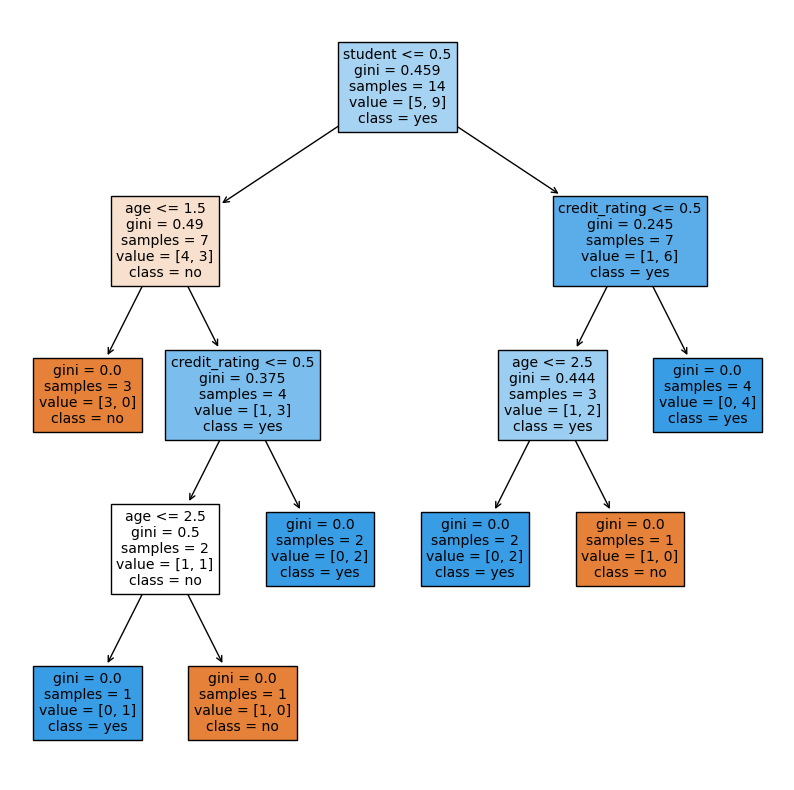

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree
# Convert categorical variables to numerical
age_num = [1, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 3]
income_num = [2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1]
student_num = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
credit_rating_num = [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0]
buys_computer_num = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

 

# Combine the numerical features into a single feature matrix
X = list(zip(age_num, income_num, student_num, credit_rating_num))

 

# Combine the target variable into a single target vector
y = buys_computer_num

 

# Construct the decision tree model
model = tree.DecisionTreeClassifier()
model.fit(X, y)

 

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(model, filled=True, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['no', 'yes'])
plt.show()